### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
baseescuela= pd.read_csv("Resources/schools_complete.csv")
baseestudiantes = pd.read_csv("Resources/students_complete.csv")


# Combine the data into a single dataset.  
basetotal = pd.merge(baseestudiantes, baseescuela, how="left", on=["school_name", "school_name"])
basetotal

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90,14,Charter,1635,1043130
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70,14,Charter,1635,1043130
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84,14,Charter,1635,1043130
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90,14,Charter,1635,1043130


In [20]:
estudiantes=basetotal['Student ID'].nunique()
base70read =  basetotal[basetotal['reading_score']>=70]
per70read= base70read['Student ID'].nunique()/estudiantes
basepass=base70read[base70read['math_score']>=70]
perpass= basepass['Student ID'].nunique()/estudiantes
perpass

0.6517232575950983

## District Summary

* Calculate the total number of schools

* Calculate the total number of students

* Calculate the total budget

* Calculate the average math score 

* Calculate the average reading score

* Calculate the percentage of students with a passing math score (70 or greater)

* Calculate the percentage of students with a passing reading score (70 or greater)

* Calculate the percentage of students who passed math **and** reading (% Overall Passing)

* Create a dataframe to hold the above results

* Optional: give the displayed data cleaner formatting

In [21]:
escuelas=basetotal['school_name'].nunique()
estudiantes=basetotal['Student ID'].nunique()
budget= baseescuela['budget'].sum()
promediomate= basetotal['math_score'].mean()
promedioread= basetotal['reading_score'].mean()
base70math =  basetotal[basetotal['math_score']>=70]
per70mat= base70math['Student ID'].nunique()/estudiantes
base70read =  basetotal[basetotal['reading_score']>=70]
per70read= base70read['Student ID'].nunique()/estudiantes
basepass=base70read[base70read['math_score']>=70]
perpass= basepass['Student ID'].nunique()/estudiantes
District_sum = pd.DataFrame(np.array([["Total Schools: ", escuelas],["Total Students: ", estudiantes],["Total Budget: ", budget],["Math Average: ", "{:.2f}".format(promediomate)],["Reading Average: ", "{:.2f}".format(promedioread)],["%students passing math: ", "{:.2%}".format(per70mat)],["%students passing Reading: ", "{:.2%}".format(per70read)],["%students passing Reading: ", "{:.2%}".format(perpass)]]),columns=['KPI', 'value'])
District_sum


,KPI,value
0,Total Schools:,15
1,Total Students:,39170
2,Total Budget:,24649428
3,Math Average:,78.99
4,Reading Average:,81.88
5,%students passing math:,74.98%
6,%students passing Reading:,85.81%
7,%students passing Reading:,65.17%


In [22]:
escuelaslista = baseescuela['school_name'].tolist()
escuelaslista

['Huang High School',
 'Figueroa High School',
 'Shelton High School',
 'Hernandez High School',
 'Griffin High School',
 'Wilson High School',
 'Cabrera High School',
 'Bailey High School',
 'Holden High School',
 'Pena High School',
 'Wright High School',
 'Rodriguez High School',
 'Johnson High School',
 'Ford High School',
 'Thomas High School']

In [47]:
detalleescuela = pd.DataFrame(columns=["School","School Type","Total Students","Total School Budget","Per Student Budget","Average Math Score","Average Reading Score","% Passing Math","Passing Reading","Overall Passing"])
for school in escuelaslista:
    basexescuela =  basetotal[basetotal['school_name']==school]
    tipoescuela=basexescuela.iloc[1, 8]
    escuelas=basexescuela['school_name'].nunique()
    estudiantes=basexescuela['Student ID'].nunique()
    budget=basexescuela.iloc[1, 10]
    budxest=float(budget)/estudiantes
    promediomate= basexescuela['math_score'].mean()
    promedioread= basexescuela['reading_score'].mean()
    base70math =  basexescuela[basexescuela['math_score']>=70]
    per70mat= base70math['Student ID'].nunique()/estudiantes
    base70read =  basexescuela[basexescuela['reading_score']>=70]
    per70read= base70read['Student ID'].nunique()/estudiantes
    basepass=base70read[base70read['math_score']>=70]
    perpass= basepass['Student ID'].nunique()/estudiantes
    detalleescuela.loc[len(detalleescuela.index)] = [school,tipoescuela,estudiantes,budget,budxest,promediomate,promedioread,per70mat,per70read,perpass]


In [48]:
detalleescuela=detalleescuela.sort_values(by=['School'],ascending=True)
detalleescuela_1=detalleescuela.set_index('School')
detalleescuela_1


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,Passing Reading,Overall Passing
School,,,,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,0.666801,0.819333,0.546423
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,0.941335,0.970398,0.913348
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,0.659885,0.807392,0.532045
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,0.683096,0.792990,0.542899
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,0.933924,0.971390,0.905995
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,0.667530,0.808630,0.535275
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,0.925059,0.962529,0.892272
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,0.656839,0.813164,0.535139
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,0.660576,0.812224,0.535392


## School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * % Overall Passing (The percentage of students that passed math **and** reading.)
  
* Create a dataframe to hold the above results

## Top Performing Schools (By % Overall Passing)

* Sort and display the top five performing schools by % overall passing.

In [49]:
sortoverall=detalleescuela_1.sort_values(by=['Overall Passing'],ascending=False)
top5over = sortoverall.head(5)
top5over

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,Passing Reading,Overall Passing
School,,,,,,,,,
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,0.941335,0.970398,0.913348
Thomas High School,Charter,1635,1043130,638.0,83.418349,83.848930,0.932722,0.973089,0.909480
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,0.933924,0.971390,0.905995
Wilson High School,Charter,2283,1319574,578.0,83.274201,83.989488,0.938677,0.965396,0.905826
Pena High School,Charter,962,585858,609.0,83.839917,84.044699,0.945946,0.959459,0.905405


## Bottom Performing Schools (By % Overall Passing)

* Sort and display the five worst-performing schools by % overall passing.

In [50]:
sortoverbot=detalleescuela_1.sort_values(by=['Overall Passing'],ascending=True)
top5bot = sortoverbot.head(5)
top5bot

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,Passing Reading,Overall Passing
School,,,,,,,,,
Rodriguez High School,District,3999,2547363,637.0,76.842711,80.744686,0.663666,0.802201,0.529882
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,0.659885,0.807392,0.532045
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,0.656839,0.813164,0.535139
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,0.667530,0.808630,0.535275
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,0.660576,0.812224,0.535392


## Math Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [51]:
grades=["9th","10th","11th","12th"]
basemate = pd.DataFrame(columns=["School","9th","10th","11th","12th"])
for school in escuelaslista:
    basexescuelaxmate =  basetotal[basetotal['school_name']==school]
    baserenglon=[school]
    for grado in grades:
            basexescuelaxmatexgrad = basexescuelaxmate[basexescuelaxmate['grade']==grado]
            promedioread= basexescuelaxmatexgrad['math_score'].mean()
            baserenglon.append(promedioread)
    basemate.loc[len(basemate.index)] = baserenglon

basematesort=basemate.sort_values(by=['School'],ascending=True)
basematesort=basematesort.set_index('School')
basematesort



,9th,10th,11th,12th
School,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


## Reading Score by Grade 

* Perform the same operations as above for reading scores

In [54]:
grades=["9th","10th","11th","12th"]
basemate = pd.DataFrame(columns=["School","9th","10th","11th","12th"])
for school in escuelaslista:
    basexescuelaxmate =  basetotal[basetotal['school_name']==school]
    baserenglon=[school]
    for grado in grades:
            basexescuelaxmatexgrad = basexescuelaxmate[basexescuelaxmate['grade']==grado]
            promedioread= basexescuelaxmatexgrad['reading_score'].mean()
            baserenglon.append(promedioread)
    basemate.loc[len(basemate.index)] = baserenglon

basematesort=basemate.sort_values(by=['School'],ascending=True)
basematesort=basematesort.set_index('School')
basematesort


,9th,10th,11th,12th
School,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

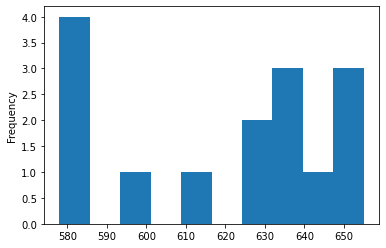

In [55]:
detalleescuela_1['Per Student Budget'].plot(kind='hist')

In [56]:
pd.qcut(detalleescuela_1['Per Student Budget'], q=4)

School
Bailey High School         (591.5, 628.0]
Cabrera High School      (577.999, 591.5]
Figueroa High School       (628.0, 641.5]
Ford High School           (641.5, 655.0]
Griffin High School        (591.5, 628.0]
Hernandez High School      (641.5, 655.0]
Holden High School       (577.999, 591.5]
Huang High School          (641.5, 655.0]
Johnson High School        (641.5, 655.0]
Pena High School           (591.5, 628.0]
Rodriguez High School      (628.0, 641.5]
Shelton High School        (591.5, 628.0]
Thomas High School         (628.0, 641.5]
Wilson High School       (577.999, 591.5]
Wright High School       (577.999, 591.5]
Name: Per Student Budget, dtype: category
Categories (4, interval[float64]): [(577.999, 591.5] < (591.5, 628.0] < (628.0, 641.5] < (641.5, 655.0]]

In [57]:
pd.qcut(detalleescuela_1['Per Student Budget'], q=4).value_counts()

(641.5, 655.0]      4
(591.5, 628.0]      4
(577.999, 591.5]    4
(628.0, 641.5]      3
Name: Per Student Budget, dtype: int64

In [65]:
detalleescuela_1['BINSPENDRAN'] = pd.qcut(detalleescuela_1['Per Student Budget'], q=4, precision = 0)
detalleescuela_1['BINSPEND'] = pd.qcut(detalleescuela_1['Per Student Budget'], q=4, precision = 0,labels=[1,2,3,4])
detalleescuela_1

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,Passing Reading,Overall Passing,BINSPEND,BINSPENDRAN
School,,,,,,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,0.666801,0.819333,0.546423,2,"(592.0, 628.0]"
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,0.941335,0.970398,0.913348,1,"(577.0, 592.0]"
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,0.659885,0.807392,0.532045,3,"(628.0, 642.0]"
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,0.683096,0.792990,0.542899,4,"(642.0, 655.0]"
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,0.933924,0.971390,0.905995,2,"(592.0, 628.0]"
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,0.667530,0.808630,0.535275,4,"(642.0, 655.0]"
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,0.925059,0.962529,0.892272,1,"(577.0, 592.0]"
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,0.656839,0.813164,0.535139,4,"(642.0, 655.0]"
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,0.660576,0.812224,0.535392,4,"(642.0, 655.0]"


In [72]:
qu=[1,2,3,4]
basespend = pd.DataFrame(columns=["Spending Ranges (Per Student)","Average Math Score","Average Reading Score","% Passing Math","% Passing Reading","% Overall Passing"])
for q in qu:
    basexq = detalleescuela_1[detalleescuela_1['BINSPEND']==q]
    rango=basexq.iloc[1, 10]
    promediomat= basexq['Average Math Score'].mean()
    promedioread= basexq['Average Reading Score'].mean()
    promediopasmat= basexq['% Passing Math'].mean()
    promediopasred= basexq['Passing Reading'].mean()
    promediopassov= basexq['Overall Passing'].mean()
    baserenglon=[rango,promediomat,promedioread,promediopasmat,promediopasred,promediopassov]
    print(baserenglon)
    basespend.loc[len(basespend.index)] = baserenglon

basespend


[Interval(577.0, 592.0, closed='right'), 83.45539900855027, 83.93381405396646, 0.9346009572653238, 0.9661087677671375, 0.9036945874402643]
[Interval(592.0, 628.0, closed='right'), 81.8998257021498, 83.15528577020937, 0.8713353760737169, 0.9271820457965273, 0.81418596324284]
[Interval(628.0, 642.0, closed='right'), 78.99094200069969, 81.91721183427846, 0.7520907785658588, 0.8608938571793466, 0.6571357846259079]
[Interval(642.0, 655.0, closed='right'), 77.02355540603445, 80.95744635742729, 0.6670101034387887, 0.8067521660065345, 0.5371761287022865]


,Spending Ranges (Per Student),Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,"(577.0, 592.0]",83.455399,83.933814,0.934601,0.966109,0.903695
1,"(592.0, 628.0]",81.899826,83.155286,0.871335,0.927182,0.814186
2,"(628.0, 642.0]",78.990942,81.917212,0.752091,0.860894,0.657136
3,"(642.0, 655.0]",77.023555,80.957446,0.667010,0.806752,0.537176


## Scores by School Size

* Perform the same operations as above, based on school size.

In [80]:
detalleescuela_1['BINSsize'] = pd.qcut(detalleescuela_1['Total Students'], q=4, precision = 0)
detalleescuela_1['BINSsizenum'] = pd.qcut(detalleescuela_1['Total Students'], q=4, precision = 0,labels=[1,2,3,4])
detalleescuela_1

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,Passing Reading,Overall Passing,BINSPEND,BINSPENDRAN,BINSsize,BINSsizenum
School,,,,,,,,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,0.666801,0.819333,0.546423,2,"(592.0, 628.0]","(3474.0, 4976.0]",4
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,0.941335,0.970398,0.913348,1,"(577.0, 592.0]","(1698.0, 2283.0]",2
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,0.659885,0.807392,0.532045,3,"(628.0, 642.0]","(2283.0, 3474.0]",3
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,0.683096,0.792990,0.542899,4,"(642.0, 655.0]","(2283.0, 3474.0]",3
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,0.933924,0.971390,0.905995,2,"(592.0, 628.0]","(426.0, 1698.0]",1
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,0.667530,0.808630,0.535275,4,"(642.0, 655.0]","(3474.0, 4976.0]",4
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,0.925059,0.962529,0.892272,1,"(577.0, 592.0]","(426.0, 1698.0]",1
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,0.656839,0.813164,0.535139,4,"(642.0, 655.0]","(2283.0, 3474.0]",3
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,0.660576,0.812224,0.535392,4,"(642.0, 655.0]","(3474.0, 4976.0]",4


In [81]:
qu=[1,2,3,4]
basesize = pd.DataFrame(columns=["Size School (Total Students)","Average Math Score","Average Reading Score","% Passing Math","% Passing Reading","% Overall Passing"])
for q in qu:
    basexq = detalleescuela_1[detalleescuela_1['BINSsizenum']==q]
    rango=basexq.iloc[1, 11]
    promediomat= basexq['Average Math Score'].mean()
    promedioread= basexq['Average Reading Score'].mean()
    promediopasmat= basexq['% Passing Math'].mean()
    promediopasred= basexq['Passing Reading'].mean()
    promediopassov= basexq['Overall Passing'].mean()
    baserenglon=[rango,promediomat,promedioread,promediopasmat,promediopasred,promediopassov]
    print(baserenglon)
    basesize.loc[len(basesize.index)] = baserenglon

basesize

[Interval(426.0, 1698.0, closed='right'), 83.6032606974742, 83.8813434979733, 0.9344124780539027, 0.9666167660640002, 0.9032879352254375]
[Interval(1698.0, 2283.0, closed='right'), 83.3444430502181, 83.91149798647766, 0.9380041226479903, 0.9651130193965742, 0.9053569386432081]
[Interval(2283.0, 3474.0, closed='right'), 76.81459088959605, 81.02899980020713, 0.6666066485002305, 0.8045155628591806, 0.5366941568037554]
[Interval(3474.0, 4976.0, closed='right'), 77.06333970236993, 80.91986372270566, 0.6646429336251576, 0.8105969148497496, 0.5367430263833595]


,Size School (Total Students),Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,"(426.0, 1698.0]",83.603261,83.881343,0.934412,0.966617,0.903288
1,"(1698.0, 2283.0]",83.344443,83.911498,0.938004,0.965113,0.905357
2,"(2283.0, 3474.0]",76.814591,81.029000,0.666607,0.804516,0.536694
3,"(3474.0, 4976.0]",77.063340,80.919864,0.664643,0.810597,0.536743


## Scores by School Type

* Perform the same operations as above, based on school type

In [93]:
tipoescuela=detalleescuela_1['School Type'].unique()

In [94]:
basetipo = pd.DataFrame(columns=["School Type","Average Math Score","Average Reading Score","% Passing Math","% Passing Reading","% Overall Passing"])
for tipo in tipoescuela:
    basexq = detalleescuela_1[detalleescuela_1['School Type']==tipo]
    promediomat= basexq['Average Math Score'].mean()
    promedioread= basexq['Average Reading Score'].mean()
    promediopasmat= basexq['% Passing Math'].mean()
    promediopasred= basexq['Passing Reading'].mean()
    promediopassov= basexq['Overall Passing'].mean()
    baserenglon=[tipo,promediomat,promedioread,promediopasmat,promediopasred,promediopassov]
    print(baserenglon)
    basetipo.loc[len(basetipo.index)] = baserenglon

basetipo

['District', 76.95673306832398, 80.96663632734915, 0.6654845257144747, 0.8079906211395059, 0.5367220822778149]
['Charter', 83.47385187384614, 83.89642074222549, 0.9362083003509466, 0.9658648927302871, 0.9043224369343227]


,School Type,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,District,76.956733,80.966636,0.665485,0.807991,0.536722
1,Charter,83.473852,83.896421,0.936208,0.965865,0.904322
